In [13]:
import pandas as pd
import numpy as np
import shutil, os
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tqdm import tqdm
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, LSTM, GRU, Bidirectional
from keras.models import Sequential
%matplotlib inline

In [2]:
train_csv = pd.read_csv('train.csv')
file_path = train_csv['filename']
type(file_path)

pandas.core.series.Series

In [3]:
def get_data(file_path):
    file_label = pd.read_csv(file_path)
    data_path = file_label['filename']
    label = file_label['label']
    img_gray = get_img_gray_data(data_path)
    return img_gray

In [4]:
def get_img_gray_data(file_path):
    img = cv2.imread(file_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray

In [33]:
get_img_data('train/94339.jpg').shape

(64, 300)

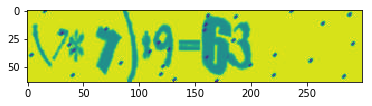

In [5]:
gray = get_img_gray_data('train/94339.jpg')
plt.imshow(gray)
#plt.show()

In [27]:
def get_percent_data(data, frac, file_name):
    part_data = data.sample(frac=frac)
    part_data.to_csv(file_name, index=False)

In [190]:
def copy_and_modify(csv_path):
    csv_data = pd.read_csv(csv_path)
    data_file_name = csv_data['filename']
    labels = csv_data['label']
    dir_file = csv_path.split('/')
    new_file_name_list = []
    files_num = len(data_file_name)
    for i in range(files_num):
        data_dir_file = data_file_name[i].split('/')
        new_file_name = dir_file[0] + '/' + data_dir_file[1] 
        shutil.copyfile(data_file_name[i], new_file_name)
        new_file_name_list.append(new_file_name)
        if (i+1) % 100 == 0:
            print('Already copy {} files.'.format(i+1))
    print('Finish copy img!')
    new_file_name_dic = {'filename':new_file_name_list}
    new_file_name_DataFrame = pd.DataFrame(new_file_name_dic)
    labels = labels.to_frame(name='label')
    new_csv_data = pd.concat([new_file_name_DataFrame, labels], ignore_index=True, axis=1, names=['filename', 'label'])
    new_csv_path = dir_file[0] + '/' + dir_file[1].split('.')[0] + '.csv'
    new_csv_data.to_csv(new_csv_path, index=False)

In [191]:
copy_and_modify('train_0.01/train_1000.csv')

Already copy 100 files.
Already copy 200 files.
Already copy 300 files.
Already copy 400 files.
Already copy 500 files.
Already copy 600 files.
Already copy 700 files.
Already copy 800 files.
Already copy 900 files.
Already copy 1000 files.
Finish copy img!


In [33]:
get_img_data('train/94339.jpg').shape

(64, 300)

In [28]:
get_percent_data(data=train_csv, frac=0.01, file_name='train_0.01/train_1000.csv')
get_percent_data(data=train_csv, frac=0.1, file_name='train_0.1/train_10000.csv')

In [ ]:
train_1000 = get_file

In [11]:
#train_filename = train['filename']
#for file_name in list(train_filename):
#    file_cp_name = 'train_/' + file_name.split('/')[1]
#    shutil.copyfile(file_name, file_cp_name)
#print('finish')

finish


In [10]:
# 
def path_to_tensor(img_path):
    img = image.load_img(img_path, target_size=(300, 64))
    img_data = image.img_to_array(img)
    return np.expand_dim(img_data, axis=0)

def paths_to_tensorlist(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [29]:
def create_crnn_model():
    crnn_model = Sequential()
    crnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', input_shape=(300, 64, 3)))
    crnn_model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    crnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same'))
    crnn_model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    crnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same'))
    crnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same'))
    crnn_model.add(MaxPooling2D(pool_size=(1, 2), strides=2))
    crnn_model.add(Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding='same'))
    crnn_model.add(BatchNormalization(axis=1))
    crnn_model.add(Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding='same'))
    crnn_model.add(BatchNormalization(axis=1))
    crnn_model.add(MaxPooling2D(pool_size=(1, 2), strides=2))
    crnn_model.add(Conv2D(filters=512, kernel_size=(2, 2), strides=1, padding='valid'))
    # map-to-sequence
    crnn_model.add(Bidirectional(LSTM(units=256)))
    crnn_model.add(Bidirectional(LSTM(units=256)))
    crnn_model.summary()
    return crnn_model

In [30]:
crnn_model = create_crnn_model()

ValueError: Input 0 is incompatible with layer bidirectional_3: expected ndim=3, found ndim=4